<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller: Reconocimiento facial con K-medias y K-medoides

En este caso-taller vamos a aplicar K-medias y K-medoides para agrupar rostros de indiviudos. Utilizaremos la base de datos conocida como Caras Olivetti. Esta base contiene diez imágenes diferentes de  40 personas distintas. Para algunas personas, las imágenes se tomaron en diferentes momentos, variando la iluminación, las expresiones faciales (ojos abiertos/cerrados, sonriendo/sin sonreír) y los detalles faciales (gafas/sin gafas). Todas las imágenes fueron tomadas contra un fondo homogéneo oscuro con los sujetos en una posición frontal erguida (con tolerancia a algún movimiento lateral). Esta base viene incluida dentro de la libraría `scikit-learn` y fueron provistas por T&T Laboratories Cambridge para que la comunidad académica la utilice para la evaluación de modelos predictivos.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos

Los datos pueden ser bajados directamente utilizando la librería `scikit-learn`,  la función que le permite hacer esto es `fetch_olivetti_faces`.

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#Load data
data_faces = fetch_olivetti_faces(shuffle=True, random_state=42)

In [ ]:
# Guardamos los datos en la carpeta 'data' (esto lo maneja automáticamente fetch_olivetti_faces)
from pathlib import Path
Path("data").mkdir(parents=True, exist_ok=True)

In [ ]:
#Descriptions
print(f"Dimensiones: {data_faces.data.shape}")
print(f"Total de imagenes: {len(data_faces.images)}")
print(f"Total de personas: {len(set(data_faces.target))}")

Dimensiones: (400, 4096)
Total de imagenes: 400
Total de personas: 40


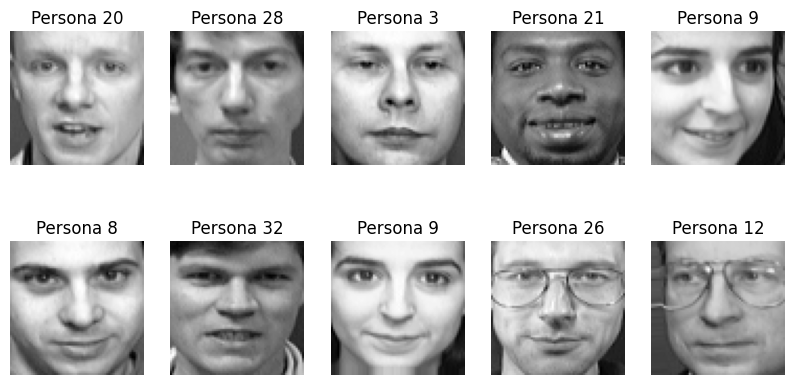

In [ ]:
#Visualization
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(data_faces.images[i], cmap="gray")
    ax.set_title(f"Persona {data_faces.target[i]}")
    ax.axis("off")
plt.show()

Se ha cargado la base de datos utilizando fetch_olivetti_faces de sklearn datasets, descargando imágenes de 40 personas, al contar con 400 imagenes. Además, se ha creado el directorio "data" para almacenar los datos.
Por otra parte, se muestra en una visualizacion las imagenes de las personas para verificar la buena carga de la información.

### 2.  Análisis preliminar

#### 2.1. Describa los contenidos de la base de datos, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes.

In [ ]:
print("Keys disponibles:", data_faces.keys())
print("Dimension de 'data_faces.data':", data_faces.data.shape)
print("Dimension de 'data_faces.images':", data_faces.images.shape)
print("# de etiquetas:", len(data_faces.target))
print("# de clases unicas:", len(set(data_faces.target)))
print("Total de fotos por cada individuo", np.bincount(data_faces.target))

Keys disponibles: dict_keys(['data', 'images', 'target', 'DESCR'])
Dimension de 'data_faces.data': (400, 4096)
Dimension de 'data_faces.images': (400, 64, 64)
# de etiquetas: 400
# de clases unicas: 40
Total de fotos por cada individuo [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]


La base contiene imágenes de rostros en blanco y negro.

En total hay 400 imágenes, que corresponden a 40 personas distintas, con 10 fotos por cada individuo. Las imágenes son en escala de grises y tienen un tamaño de 64 × 64 píxeles, es decir, cada foto se puede representar como un vector de 4096 valores (la intensidad de cada píxel)

La base incluye:

1. Las imagenes originales en formato matriz (64 × 64)
2. Una version de las imágenes convertidas en vectores (4096 valores)
3. Las etiquetas que identifican a la persona en cada foto (del 0 al 39)
4. Una breve descripcion del dataset

#### 2.2. Genere una figura con una imágen de cada uno de los individuos

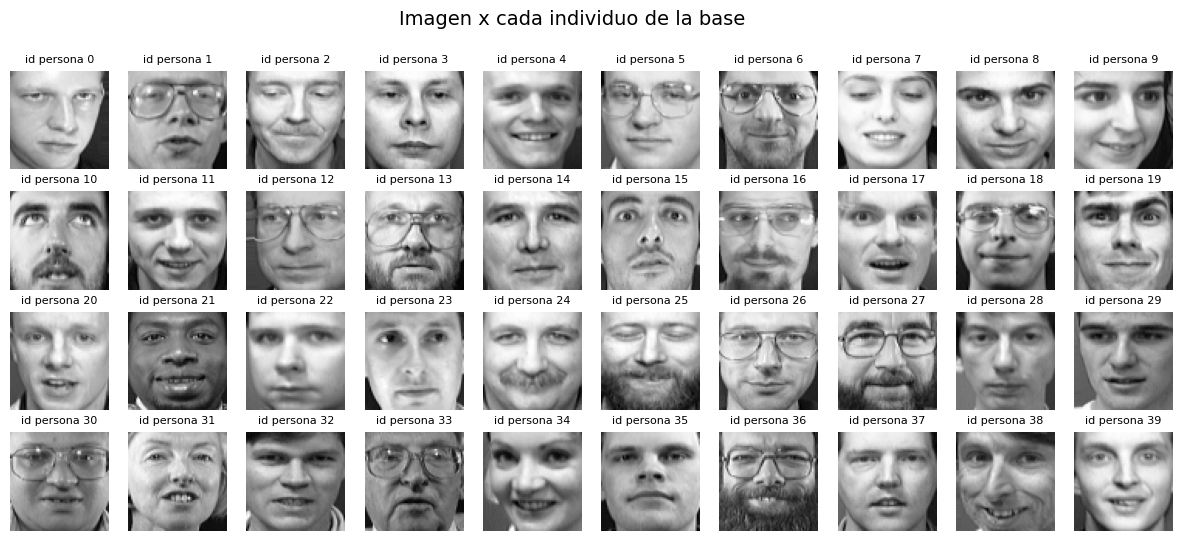

In [ ]:
label_unicos = np.unique(data_faces.target)
indice_primera_foto = [np.where(data_faces.target == label)[0][0] for label in label_unicos]

#Figura
fig, axes = plt.subplots(4, 10, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(data_faces.images[indice_primera_foto[i]], cmap="gray")
    ax.set_title(f"id persona {label_unicos[i]}", fontsize=8)
    ax.axis("off")

plt.suptitle("Imagen x cada individuo de la base", fontsize=14)
plt.show()

#### Proceso
Se generó una figura en la que aparece una imagen representativa de cada una de las 40 personas incluidas en la base
1. Se identificaron las etiquetas unicas de las personas (target)
2. Para cada persona se selecciono la primera foto disponible en la base
3. Con estas 40 fotos se construyó una figura organizada donde se muestra cada persona

#### Análisis

1. La base contiene 40 personas distintas, cada una identificada con un ID unico.
2. Las imagenes son en escala de grises y tienen un tamaño de 64 × 64 píxeles todas.
3. Hay variabilidad en expresiones faciales, temas de luces o ilumnacion y los angulos en los que fueron tomadas las fotos, practico para tareas de reconocimiento o segmentacion.
4. La mayoria de rostros son de personas de genero masculino, se denota una cantidad minoritaria de rostros femenninos en el dataset.
5. La imagen refleja una generalidad de que los rostros estan mirando de frente para la imagen.
6. 3 de cada 10 personas de las imagenes poseen gafas.

#### Conclusiones

En esta fase de exploracion, podemos concluir que el dataset esta bien balanceado, con el mismo número de fotos por persona (10). Además, muestra que las imágenes presentan suficientes cambios o variaciones, además existe singularidades dentro de cada persona de las imagenes, al producir que sea un buen banco de pruebas de algun modelo de segmentacion, ya que reune diferentes caracteristicas. Sin embargo, al existir pocas personas de genero femenino puede existir cierta limitación dentro del modelo porque no existen tantos rostros femeninos dentro de la base de estudio.

#### 2.3. Transforme las imágenes en un data frame donde cada columna contiene los valores estandarizados del nivel de gris en la imagen y una columna con la etiqueta de cada imagen.

In [ ]:
#Matriz con las caras aplanadas
X = data_faces.data #valores
y = data_faces.target #eiquetas de las fotos

In [ ]:
#Estandarizacion
scaler = StandardScaler(with_mean=True, with_std=True)
X_std = scaler.fit_transform(X)

In [ ]:
#Creacion del df
pixel_cols = [f"pixel_{i}" for i in range(X_std.shape[1])]
df_faces = pd.DataFrame(X_std, columns=pixel_cols)
df_faces["label"] = y

In [ ]:
df_faces.shape, df_faces.head(3)

((400, 4097),
     pixel_0   pixel_1   pixel_2   pixel_3   pixel_4   pixel_5   pixel_6  \
 0 -1.118128 -1.049833 -0.642890 -0.566583 -0.708002 -0.891842 -0.727535   
 1 -1.186820 -1.617487 -1.853886 -2.000562 -1.958482 -1.795912 -1.123675   
 2  0.599163  0.893291  0.738070  0.567760  0.542478  0.429491  0.411366   
 
     pixel_7   pixel_8   pixel_9  ...  pixel_4087  pixel_4088  pixel_4089  \
 0 -0.765900 -0.949737 -0.856826  ...    0.776525    0.891845    0.788581   
 1 -0.685834 -0.641426 -0.626303  ...    0.162267    0.253959   -0.285735   
 2  0.515159  0.535760  0.641575  ...   -0.360991   -0.315583   -0.219961   
 
    pixel_4090  pixel_4091  pixel_4092  pixel_4093  pixel_4094  pixel_4095  \
 0    0.770895    0.700551   -0.260389   -1.382848   -1.011783   -1.216934   
 1    0.437391    0.656828   -0.451072   -0.700041   -0.561125   -0.552694   
 2   -0.073982    0.000984   -0.027331    0.070869    0.159927    0.180261   
 
    label  
 0     20  
 1     28  
 2      3  
 
 [3 ro

#### Procedimiento
1. Aplanamiento de fotos: cada foto de 64 × 64 píxeles se transformó en un vector de 4096 valores, para generar una matriz de 400 × 4096 (data_faces.data).
2. Estandarización: se aplicó la transformación de z-score a cada columna (píxel), de manera que cada variable tenga media 0 y desviación estándar 1. Esto evita que los píxeles con mayor variabilidad dominen el análisis.
3. Creación del df: se generó un df en Pandas con 4096 columnas, cada una representando un píxel (pixel_0 hsta pixel_4095), y se añadió una columna adicional label que contiene la etiqueta de la persona correspondiente (0–39, el target).

#### Analisis

1. La estructura final del df es de 400 filas × 4097 columnas
2. Cada fila corresponde a una imagen estandarizada, con 4096 variables numéricas (los píxeles) más la etiqueta de clase
3. Es clave estandarizar para hacer uso de los algoritmos de reducción de dimensionalidad (PCA) y clustering (como K-Means o K-Medoides) ya que estos son muy sensibles a las escalas de los datos

#### Conclusiones

Se asegura comparabilidad entre todas las variables (píxeles), lo que permitirá que los algoritmos de PCA o segmentación trabajen de manera más estable y representativa

### 3. Clasificando de forma no supervisada

En esta sección trataremos de clasificar las imágenes de los individuos de forma no supervisada. Para ello utilizaremos los algoritmos de k-medias y k-medoides. Dado que sabemos que el dataset consta de 40 personas diferentes, utilizaremos esta información para pedirle a los algoritmos que encuentren k=40 clusters y examinaremos su precisión.


#### 3.1. Implemente k-medias sobre los datos estandarizados en el punto anterior.
Al implementar utilice  `random_state=123` y `n_init=10`. (Esto puede tomar mucho tiempo y requerir mucho RAM, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))

In [ ]:
# Utilice este espacio para escribir el código.
from sklearn.cluster import KMeans

kmeans_40 = KMeans(n_clusters = 40, random_state = 123, n_init=10).fit_predict(X_std)

In [ ]:
kmeans_40[0:39]

array([ 4,  2, 13,  8, 39, 18, 26, 38, 15,  4, 12,  7,  6, 17, 28, 32, 29,
       12, 23, 20, 17, 22, 11, 29,  3, 11, 21, 18, 15, 10, 32, 32, 15,  6,
       34, 21, 21,  5,  3], dtype=int32)

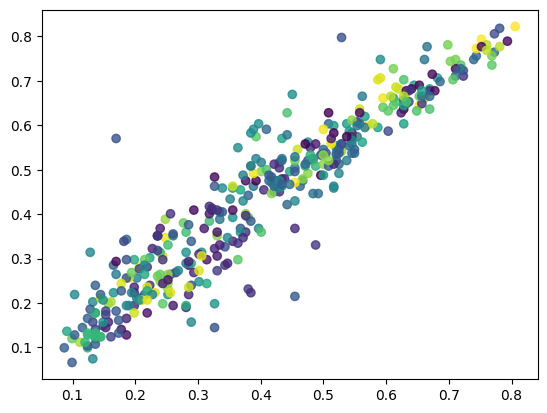

In [ ]:
fig, ax = plt.subplots()
g_puntos = plt.scatter(X[:,0], X[:,1], c = kmeans_40, alpha = 0.8, label = "Centroides")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_std, kmeans_40)
print("Silhouette Score:", score)

Silhouette Score: 0.14948846


In [ ]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, kmeans_40)
print("ARI:", ari)

ARI: 0.44664593530548324


#### Procedimiento
1. Se uso la libreria de K-Means de Sklearn cluster para realizar el proceso, usando como refenrencia 40 clusters, por ser 40 individuos dentro de la muestra. Asimismo, se uso las siguientes condiciones para realizar el proceso de clusters que son random_state=123 y n_init=10, donde  random se refiere semilla para garantizar la reproducibilidad de los resultados y  n_init es el número de veces que se va a repetir el proceso, cada vez con una asignación aleatoria inicial distinta.
2. Posterior a realizacion del codigo de K-mean se identifica las observaciones a que clusters estan perteneciendo cada imagen.
3. Se observa la predicción, realizada por el proceso de K-means. donde cada color diferente representa un clusters distinto dentro del grafico de dispersion de los datos de la muestra.
4. Por ultimo, se realiza unas metricas para saber si se esta realizando bien el proceso de clusters por K-means

#### Analisis
1. Se observan muchos colores, es decir se logran identificar los 40 cluster, pero se evidencia una mezcla entre puntos de diferentes clusters. Esto significa que los límites entre grupos no son claros, hay presencia de  solapamiento y los clusters no estan definidos perfectamente.
2.  A partir de los metricas expuestas como el Silhouette Score que mide qué tan bien definidos están los clusters teniendo en cuenta un rango de [-1,1] donde -1 es que existe una mala definición o asignacion de los clusters, 0 se refiere que existen los clusters pero se solapan y es dificil distinguirlos y por ultimo 1 hace referencia a que los Clusters bien separados y compactos. Por el resultado, de 0.14, el cual es cercano a 0, se plantea que los clusters no están bien separados y definidos y hay presencia de solapamiento y dificil distinción.
Por otra parte, el ARI o Adjusted Rand Index es comparación de los clusters obtenidos con las etiquetas reales. Al tener un ARI de 0.44, existe una concordancia moderada con las etiquetas realesm Al lograr capturar algo de la estructura de los datos, aunque no los separe perfectamente.

#### Conclusión

El algoritmo logró separar los datos en 40 grupos. Sin embargo, los clusters presentan un alto nivel de solapamiento, poca cohesión y baja separación entre ellos. Al reflejar los grupos no son compactos ni claramente definidos, como se puede evidenciar en la grafica y en las metricas expuestas.

#### 3.2. Evalúe la precisión del algoritmo para agrupar las imágenes de los individuos.

In [ ]:
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
from scipy.stats import mode

# y -> etiquetas reales
# kmeans_40 -> etiquetas de clustering

# --- Calcular NMI ---
nmi = normalized_mutual_info_score(y, kmeans_40)
print("NMI:", nmi)

# --- Calcular Accuracy ---
# Se mapean clusters a clases reales usando la moda de cada cluster
labels = np.zeros_like(kmeans_40)
for i in range(40):  # 40 clusters esperados
    mask = (kmeans_40 == i)
    if np.any(mask):  # evitar clusters vacíos
        labels[mask] = mode(y[mask])[0]

acc = accuracy_score(y, labels)
print("Accuracy:", acc)
accuracy = acc

NMI: 0.7820540529106823
Accuracy: 0.66


#### Procedimiento
Se indigaron nuevas metricas pertenecientes al componente k-means para realizar el analisis mas exhaustivo y complementar ya las metricas expuestas en el punto anterior. Como resultado se pudo obtener las siguientes metricas:
NMI o  Normalized Mutual Information, donde mide cuánta información comparten clustering y etiquetas reales. Y el Accuracy, la cual observa la precisión del algoritmo usado.

#### Analisis
1. El NMI = 0.78, refleja que los clusters generados comparten bastante información con las clases reales.
2. El Accuracy = 66%, denota que más de la mitad de las imágenes se clasificaron correctamente en su grupo correspondiente.

#### Conclusión
El modelo de K-means logra identificar patrones relevantes en los datos, con una precisión del 66% y un alto nivel de información compartida con las etiquetas reales del 0.78.  Al demostrar, que K-Means puede capturar buena parte de la estructura de los individuos, aunque no alcanza una separación perfecta.



#### 3.3. Usando PCA reduzca la dimensión de la matriz de predictores.
Retenga el numero de componentes que explican el 95% de la varianza y vuelva a utilizar k-medias para clasificar las imágenes comentado si la precisión mejoró.

Aplicando Análisis de Componentes Principales (PCA)
Dimensiones originales: 4096
Dimensiones reducidas por PCA para 95% de varianza: 123
Se Aplica PCA y comparamos
              ANÁLISIS COMPARATIVO DE MÉTRICAS
                          Antes de PCA   |   Después de PCA
------------------------------------------------------------
Accuracy:                    0.6600      |      0.6400
NMI (Mutual Information):    0.7821      |      0.7750
ARI (Adjusted Rand Index):   0.4466      |      0.4433


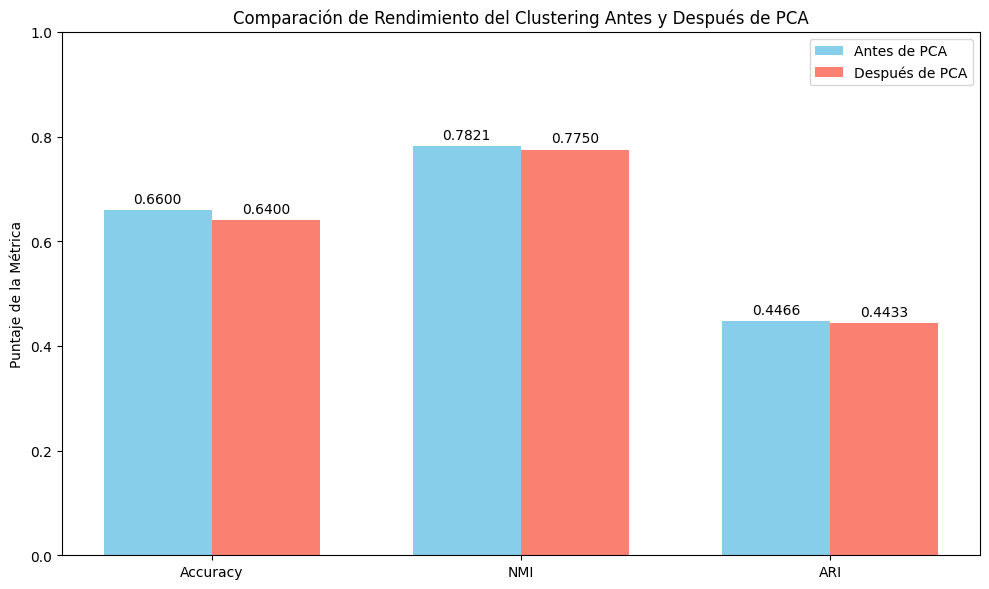

In [ ]:
# 1. Reducción de dimensionalidad con PCA
# Usamos X_std datos ya estandarizados
print("Aplicando Análisis de Componentes Principales (PCA)")
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_std)
print(f"Dimensiones originales: {X_std.shape[1]}")
print(f"Dimensiones reducidas por PCA para 95% de varianza: {pca.n_components_}")

# 2. Re-entrenamiento y Evaluación de K-Medias con PCA
n_clases = len(np.unique(y))
print("Se Aplica PCA y comparamos")
# Aplicamos K-medias
kmeans_pca = KMeans(n_clusters=n_clases, random_state=123, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Cálculo de las métricas de rendimiento con PCA
# Accuracy
labels_pca = np.zeros_like(clusters_pca)
for i in range(n_clases):
    mask = (clusters_pca == i)
    if np.any(mask):
        labels_pca[mask] = mode(y[mask], keepdims=True)[0]
accuracy_pca = accuracy_score(y, labels_pca)
# NMI y ARI
nmi_pca = normalized_mutual_info_score(y, clusters_pca)
ari_pca = adjusted_rand_score(y, clusters_pca)

# 3. Comparación y Análisis de Resultados
print("="*60)
print("              ANÁLISIS COMPARATIVO DE MÉTRICAS")
print("="*60)
print(f"                          Antes de PCA   |   Después de PCA")
print("-"*60)
print(f"Accuracy:                    {accuracy:.4f}      |      {accuracy_pca:.4f}")
print(f"NMI (Mutual Information):    {nmi:.4f}      |      {nmi_pca:.4f}")
print(f"ARI (Adjusted Rand Index):   {ari:.4f}      |      {ari_pca:.4f}")
print("="*60)

#Analisis grafico
# Etiquetas
labels = ['Accuracy', 'NMI', 'ARI']
valores_antes_pca = [accuracy, nmi, ari]
valores_despues_pca = [accuracy_pca, nmi_pca, ari_pca]
# Config grafica
x = np.arange(len(labels))
ancho_barra = 0.35  # Ancho de las barras
fig, ax = plt.subplots(figsize=(10, 6))
# Creamos las barras para "Antes de PCA" y "Después de PCA"
rects1 = ax.bar(x - ancho_barra/2, valores_antes_pca, ancho_barra, label='Antes de PCA', color='skyblue')
rects2 = ax.bar(x + ancho_barra/2, valores_despues_pca, ancho_barra, label='Después de PCA', color='salmon')
# Añadimos títulos y etiquetas para mayor claridad
ax.set_ylabel('Puntaje de la Métrica')
ax.set_title('Comparación de Rendimiento del Clustering Antes y Después de PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim(0, 1.0)
ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')
# Mostramos el gráfico
fig.tight_layout()
plt.show()

**Conclusiones:**

Los resultados demuestran lo eficiente que s PCA a pesar de una drástica reducción de dimensiones del 97% de 4096 a 123 componentes el rendimiento de K-Means se mantuvo estable:

*   La Accuracy bajó solo un 2%, de 0.66 a 0.64.
*   El NMI y el ARI se mantuvieron prácticamente idénticos, con caídas insignificantes.

Por lo tanto se concluye que la precisión no empeoro significativamente y PCA demostró ser una herramienta poderosa logrando una comprensión de los datos y reduciendo la complejidad computacional.

#### 3.4. Utilice ahora el algoritmo por  K-medoides
(Use el mismo random state a los puntos anteriores), comente si mejoró la precisión total y para cada grupo de imágenes.

In [ ]:
#!pip install "numpy<2.0"
#!pip install --no-cache-dir scikit-learn-extra
!pip install scikit-learn-extra

In [ ]:
# Utilice este espacio para escribir el código.
from sklearn_extra.cluster import KMedoids

# Aplicamos K medoides a datos estandarizados
kmedoid=KMedoids(n_clusters=40,random_state=123).fit(X_std)

kmedoid_40=kmedoid.predict(X_std)

labels_medoid = np.zeros_like(kmedoid_40)

for i in range(40):
    mask = (kmedoid_40 == i)
    if np.any(mask):
        labels_medoid[mask] = mode(y[mask], keepdims=True)[0]

# Obtenemos metricas
accuracy_medoid = accuracy_score(y, labels_medoid)
nmi_medoid = normalized_mutual_info_score(y, kmedoid_40)
ari_medoid = adjusted_rand_score(y, kmedoid_40)


# Aplicamos K-medoides a datos con dimensiones reducidas
kmedoid_pca=KMedoids(n_clusters=40,random_state=123).fit(X_pca)
kmedoid_40_pca=kmeans_pca.predict(X_pca)

labels_medoid_pca = np.zeros_like(kmedoid_40_pca)

for i in range(40):
    mask = (kmedoid_40_pca == i)
    if np.any(mask):
        labels_medoid_pca[mask] = mode(y[mask], keepdims=True)[0]

# Obtenemos  metricas
accuracy_medoid_pca = accuracy_score(y, labels_medoid_pca)
nmi_medoid_pca = normalized_mutual_info_score(y, kmedoid_40_pca)
ari_medoid_pca = adjusted_rand_score(y, kmedoid_40_pca)



**Procedimiento**

Como otra alternativa se utiliza k-medoides para realizar el clustering de las imágenes. Este metodo de clustering es menos sensible a valores atípicos que k_means. Para ello aplicamos la funcion KMedoids de la libreria sk_learn_extra. Ajustamos el modelo con el mismo random state y número de clusters, y utilizamos la métrica de distancia default que es la euclidiana.

Entrenamos y predecimos sobre los datos estandarizados y obtenemos los labels correctos para cada uno de los clusters estimados. Adicionalmente, calculamos las mismas métricas que en KMeans para poder evaluar ambos métodos.

Repetimos el proceso detallado pero sobre los datos reducidos con PCA para la comparación de resultados.

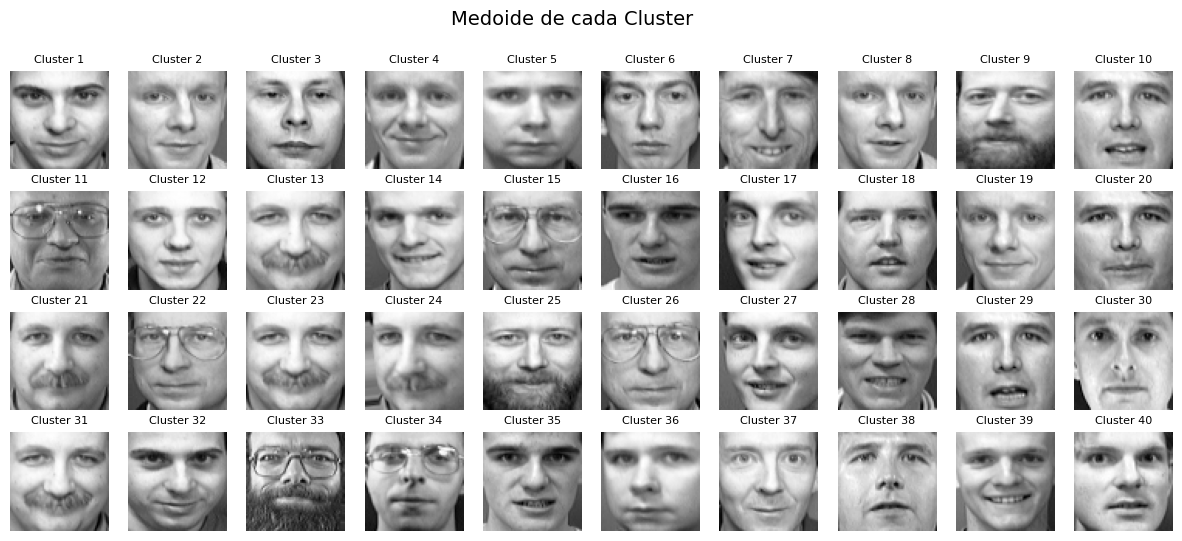

In [ ]:

fig, axes = plt.subplots(4, 10, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    img=kmedoid.cluster_centers_[i]
    ax.imshow(scaler.inverse_transform(img.reshape(1,-1)).reshape(64,64),cmap="gray")
    ax.set_title(f"Cluster {i+1}", fontsize=8)
    ax.axis("off")

plt.suptitle("Medoide de cada Cluster", fontsize=14)
plt.show()



Al usar medoides en vez de centroides, cada centro de cluster representa una imagen del dataset. Entonces, una forma de evaluar el desempeño es revisar si varios clusters tienen a la misma persona como su centroide. En una clasificación perfecta cada centroide debería representar a una persona distinta.

Revisando el gráfico presentado arriba notamos que varias personas se repiten en distintos clusters. Los clusters 10, 20, 29 y 38 tienen como centroide a la misma persona, aunque con una expresión distinta en cada imagen. Asimismo, los clusters 13, 21, 23, 24 y 31 reflejan al mismo individuo con diferencias muy ligeras entre cada foto. Las notorias semejanzas entre centroides de varios clusters indican un pobre desempeño en la partición de imagenes por persona.

A continuación se presentan las métricas del clustering por K-Medoides y las relacionamos frente a los obtenidas con K-Means.

In [ ]:
print("="*100)
print("              ANÁLISIS COMPARATIVO DE MÉTRICAS")
print("="*100)
print("                                       KMEANS                 |                KMEDOIDS")
print(f"                          Antes de PCA   |   Después de PCA   |    Antes de PCA   |   Después de PCA")
print("-"*100)
print(f"Accuracy:                    {accuracy:.4f}      |      {accuracy_pca:.4f}        |      {accuracy_medoid:.4f}      |      {accuracy_medoid_pca:.4f}")
print(f"NMI (Mutual Information):    {nmi:.4f}      |      {nmi_pca:.4f}        |      {nmi_medoid:.4f}      |      {nmi_medoid_pca:.4f}")
print(f"ARI (Adjusted Rand Index):   {ari:.4f}      |      {ari_pca:.4f}        |      {ari_medoid:.4f}      |      {ari_medoid_pca:.4f}")
print("="*100)


              ANÁLISIS COMPARATIVO DE MÉTRICAS
                                       KMEANS                 |                KMEDOIDS
                          Antes de PCA   |   Después de PCA   |    Antes de PCA   |   Después de PCA
----------------------------------------------------------------------------------------------------
Accuracy:                    0.6600      |      0.6400        |      0.4400      |      0.6400
NMI (Mutual Information):    0.7821      |      0.7750        |      0.6567      |      0.7750
ARI (Adjusted Rand Index):   0.4466      |      0.4433        |      0.2391      |      0.4433


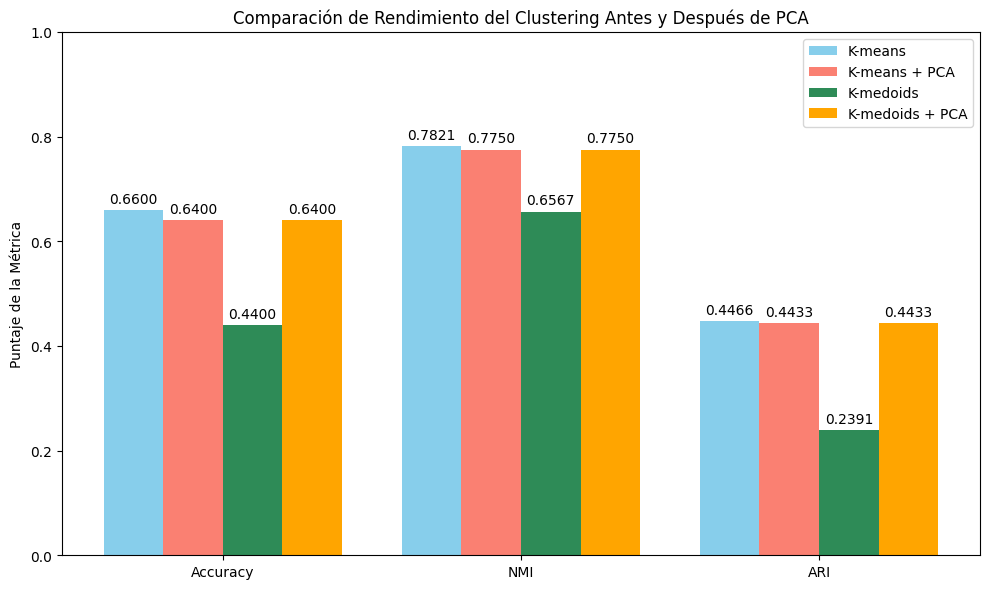

In [ ]:
labels_metrics = ['Accuracy', 'NMI', 'ARI']
metrics_kmeans = [accuracy, nmi, ari]
metrics_kmeans_pca = [accuracy_pca, nmi_pca, ari_pca]
metrics_kmedoids = [accuracy_medoid, nmi_medoid, ari_medoid]
metrics_kmedoids_pca = [accuracy_medoid_pca, nmi_medoid_pca, ari_medoid_pca]
# Config grafica
x = np.arange(len(labels))
ancho_barra = 0.2  # Ancho de las barras
fig, ax = plt.subplots(figsize=(10, 6))
# Creamos las barras para todas las metricas"
rects1 = ax.bar(x - 1.5*ancho_barra, metrics_kmeans, ancho_barra, label='K-means', color='skyblue')
rects2 = ax.bar(x - 0.5*ancho_barra, metrics_kmeans_pca, ancho_barra, label='K-means + PCA', color='salmon')
rects3 = ax.bar(x + 0.5*ancho_barra, metrics_kmedoids, ancho_barra, label='K-medoids', color='seagreen')
rects4 = ax.bar(x + 1.5*ancho_barra, metrics_kmedoids_pca, ancho_barra, label='K-medoids + PCA', color='orange')
# Añadimos títulos y etiquetas para mayor claridad
ax.set_ylabel('Puntaje de la Métrica')
ax.set_title('Comparación de Rendimiento del Clustering Antes y Después de PCA')
ax.set_xticks(x)
ax.set_xticklabels(labels_metrics)
ax.legend()
ax.set_ylim(0, 1.0)
ax.bar_label(rects1, padding=3, fmt='%.4f')
ax.bar_label(rects2, padding=3, fmt='%.4f')
ax.bar_label(rects3, padding=3, fmt='%.4f')
ax.bar_label(rects4, padding=3, fmt='%.4f')
# Mostramos el gráfico
fig.tight_layout()
plt.show()

**Análisis**



*   K medoides tiene un accuracy del 44% frente al 66% de K Means. Menos de la mitad de las imagenes se clasificaron correctamente.
*   El NMI también es menor al de K Means con un valor de 0.66 hay menor similitud entre los clusters y las particiones reales.
*   Al tener un ARI superior a 0 el modelo se desempeña mejor que un clustering aleatorio. Sin embargo, el valor es menor al de K Means.
*   Los resultados de K medoides con y sin PCA son bastante similares, la reducción de dimensionalidad no tiene mayor impacto sobre el desempeño del modelo.



**Conclusión**

A nivel general se puede concluir un peor desempeño en el clustering de las imagenes por parte de K-Medoides, todos los indicadores presentan peores puntajes frente a K-Means.

Si bien es cierto que el dataset cuenta con imagenes de 40 personas distintas, es muy posible que varias de estas personas tengan apariencias similares entre sí. Por lo tanto, es posible que un número menor de clusters lleve a una clasificación mas precisa donde se puedan evidenciar diferencias más significativas entre las fotos de cada cluster.

### 4. Número de clusters óptimo

En el punto anteriores utilizamos nuestro conocimiento previo sobre los datos para elegir el número de clusters. En este punto, verifique si 40 es realmente el número de cluster que usted elegiría según los criterios estudiados en los cuadernos teóricos. Discuta los resultados obtenidos.

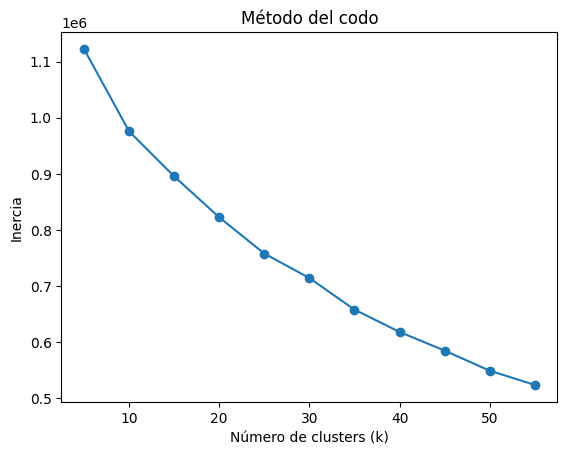

In [ ]:
# Utilice este espacio para escribir el código.
from sklearn.cluster import KMeans
inertia = []
K = range(5, 60, 5)  # probamos de 5 a 55 clusters
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'o-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.show()


En primer lugar, por medio del método del codo se observa que:
* La curva no muestra un codo claro en k=40 (que sería el número real de individuos).
* Se observa un descenso continuo y relativamente suave a partir de ~20 clusters.
* Esto sugiere que no hay una estructura fuertemente marcada con 40 grupos, sino que el dataset puede estar mejor representado con menos clusters.
* El “codo” podría ubicarse alrededor de 20 y 30, donde la pendiente empieza a suavizarse.


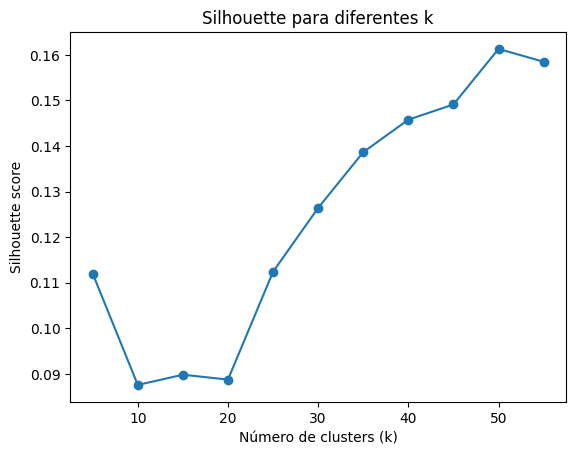

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []
K = range(5, 60, 5)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_pred = kmeans.fit_predict(X_std)
    sil = silhouette_score(X_std, labels_pred)
    sil_scores.append(sil)

plt.plot(K, sil_scores, 'o-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette para diferentes k")
plt.show()


Por su parte, en cuanto al coeficiente de silhouette se observa que:
* Los valores de silhouette son bajos en general (menor a 0.2), lo que indica que la separación entre clusters no es muy clara en este espacio de alta dimensión.
* Para valores de k pequeños (entre 10 y 20) el score es muy bajo (~0.09), lo que muestra mala separación.
* A medida que aumenta k, el score mejora y alcanza su mejor valor en k≈50 (~0.16), sin embargo, ese valor sigue siendo bajo comparado con datasets donde los clusters están bien definidos (típicamente silhouette > 0.5).

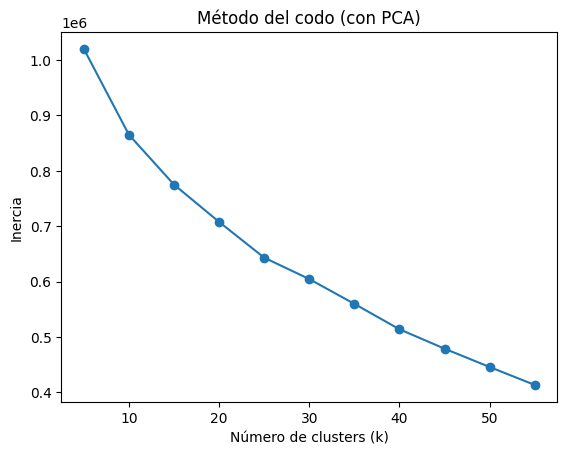

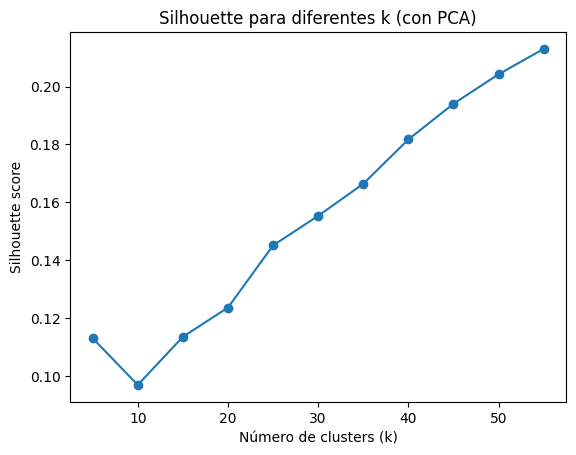

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# --- PCA con 100 componentes ---
pca = PCA(n_components=100, random_state=42)
X_pca = pca.fit_transform(X_std)

# --- Método del codo ---
inertia_pca = []
K = range(5, 60, 5)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_pca.append(kmeans.inertia_)

plt.plot(K, inertia_pca, 'o-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo (con PCA)")
plt.show()

# --- Silhouette ---
sil_scores_pca = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_pred = kmeans.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels_pred)
    sil_scores_pca.append(sil)

plt.plot(K, sil_scores_pca, 'o-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Silhouette para diferentes k (con PCA)")
plt.show()


Al aplicar clustering directamente sobre los datos originales (4096 pixeles), los resultados mostraron bajos valores de Silhouette (cercano a 0.16) y un número de clusters sugerido entre 20 y 30, lo que no coincide con los 40 individuos reales del dataset. Tras reducir la dimensionalidad con PCA (100 componentes), la calidad del clustering mejoró: el Silhouette aumentó (~0.21) y tanto el método del codo como el puntaje de Silhouette sugieren un número de clusters más cercano a 40. Esto evidencia que PCA es un paso clave para eliminar ruido y resaltar la estructura latente en datos de alta dimensión como imágenes faciales.

Cabe resaltar finalmente, que no hay un critero preciso para determinar el número de clústeres óptimo entre metodología y la decisión varía entre investigadores.